In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('../data/preprocessed/AMZN_stock_data_processed.csv') 

backcandles = 30 




In [9]:
def create_sequences(data, backcandles):
    X, y = [], []
    for i in range(len(data) - backcandles):
        X.append(data[i:i + backcandles])
        y.append(data[i + backcandles])
    return np.array(X), np.array(y)

data = df[['Open', 'High', 'Low', 'Close']].values
X, y = create_sequences(data, backcandles)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lstm_input = tf.keras.layers.Input(shape=(backcandles, 4), name="lstm_input")
inputs = tf.keras.layers.LSTM(150, name="first_layer")(lstm_input)
outputs = tf.keras.layers.Dense(4, name="dense_layer", activation="linear")(inputs)
model = tf.keras.models.Model(inputs=lstm_input, outputs=outputs)

adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss="mse")
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)              │ (None, 30, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (LSTM)                   │ (None, 150)                 │          93,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 4)                   │             604 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,604 (365.64 KB)

 Trainable params: 93,604 (365.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - loss: 3920.1584 - val_loss: 2424.5295
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 2013.2310 - val_loss: 1267.6094
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 1036.3765 - val_loss: 780.3319
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 614.3431 - val_loss: 476.9570
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 402.8820 - val_loss: 293.7255
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 229.8600 - val_loss: 195.2802
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 132.9872 - val_loss: 126.7150
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 115.2405 - val_loss: 85.4845
Epoch 9/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 78.0515 - val_loss: 72.5606
Epoch 10/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 64.6617 - val_loss: 55.2016
Epoch 11/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 37.1060 - val_loss: 41.783

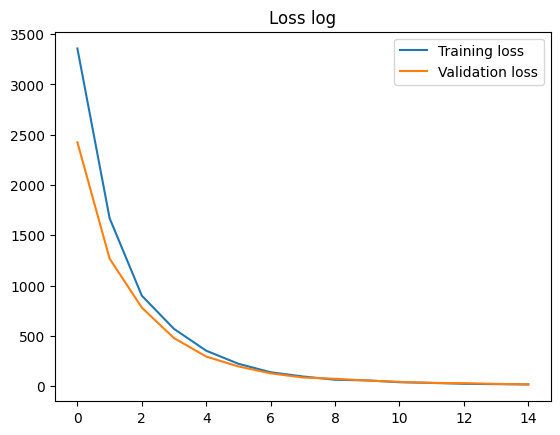

In [11]:
history = model.fit(x=x_train, y=y_train, batch_size=16, epochs=15, validation_split=0.1)

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.title("Loss log")
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
MSE:  15.934655934466823
R²:  0.9954629710669505


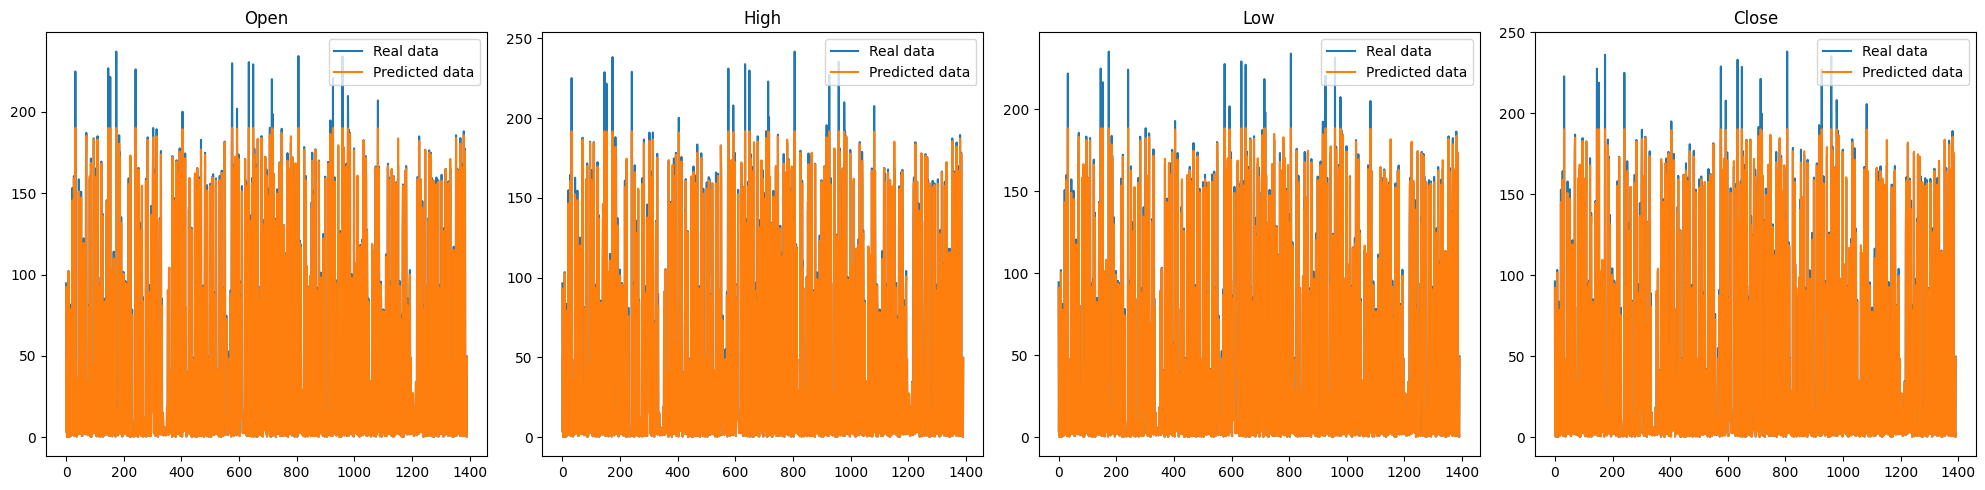

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R²: ", r2)


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
feature_names = ['Open', 'High', 'Low', 'Close'] 

for i in range(4):
    axes[i].plot(y_test[:, i], label="Real data")
    axes[i].plot(y_pred[:, i], label="Predicted data")
    axes[i].legend()
    axes[i].set_title(feature_names[i])

plt.tight_layout()
plt.show()

In [13]:
lstm_input = tf.keras.layers.Input(shape=(backcandles, 4), name="lstm_input")
x = tf.keras.layers.LSTM(150, return_sequences=True, name="first_lstm_layer")(lstm_input)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.LSTM(100, name="second_lstm_layer")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, name="dense_layer", activation="linear")(x)
model = tf.keras.models.Model(inputs=lstm_input, outputs=outputs)

In [14]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss="mse")
model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=16, epochs=30, validation_split=0.1)




Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)              │ (None, 30, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_lstm_layer (LSTM)              │ (None, 30, 150)             │          93,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_lstm_layer (LSTM)             │ (None, 100)                 │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193,804 (757.05 KB)

 Trainable params: 193,804 (757.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - loss: 4401.8721 - val_loss: 3137.5098
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 2589.4497 - val_loss: 2012.2631
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 1680.9554 - val_loss: 1301.5994
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 1070.7333 - val_loss: 874.0740
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - loss: 719.6984 - val_loss: 590.1647
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 551.6776 - val_loss: 466.7091
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 392.7285 - val_loss: 276.7642
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 244.2369 - val_loss: 190.8261
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 173.9457 - val_loss: 134.0468
Epoch 10/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 131.9452 - val_loss: 104.2086
Epoch 11/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 105.3463 

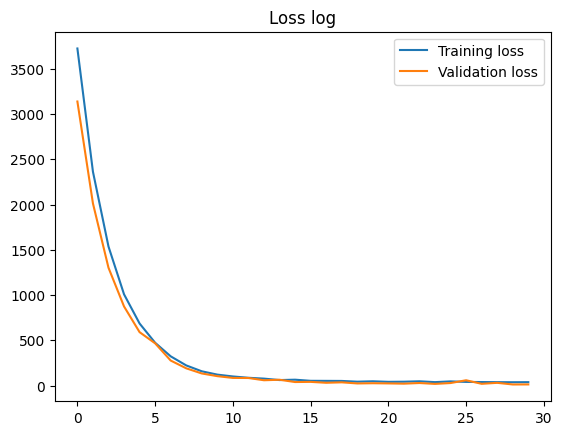

In [15]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.legend()
plt.title("Loss log")
plt.show()


In [16]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R²: ", r2)

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
MSE:  11.211492033492968
R²:  0.9968064192436741


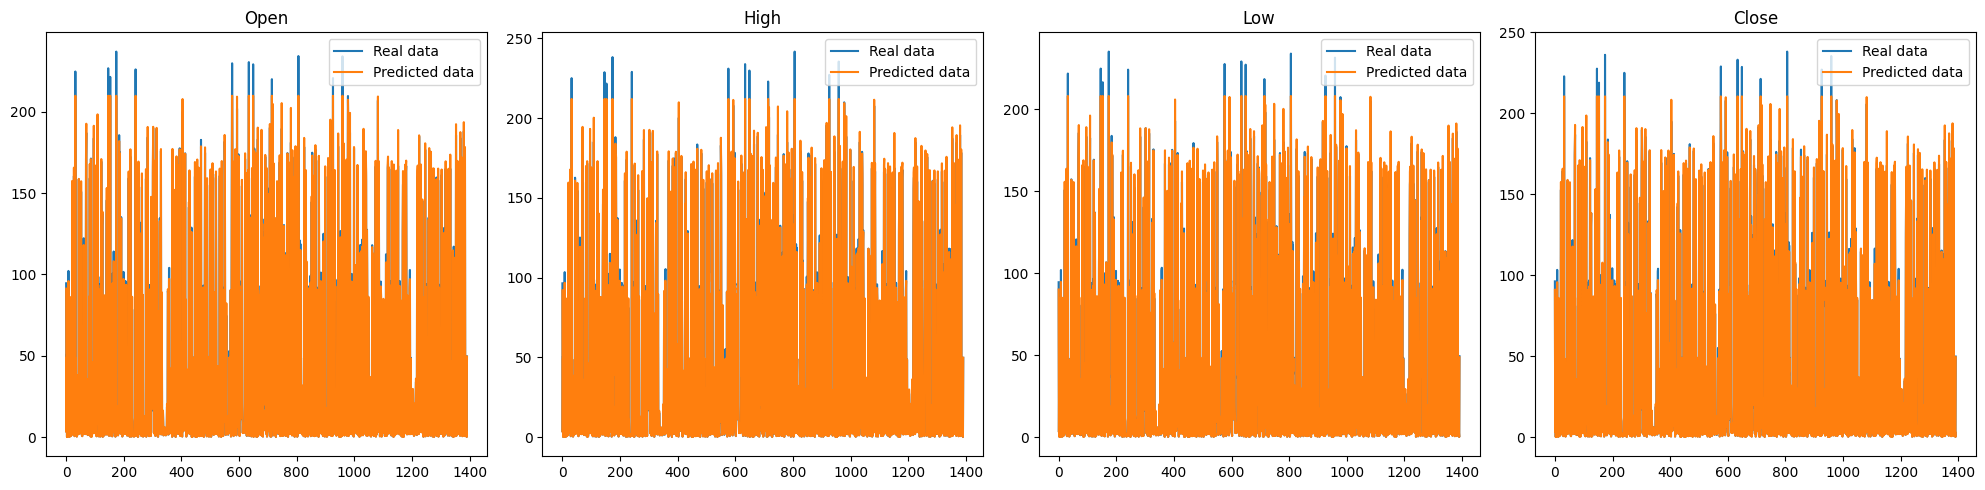

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
feature_names = ['Open', 'High', 'Low', 'Close']  

for i in range(4):
    axes[i].plot(y_test[:, i], label="Real data")
    axes[i].plot(y_pred[:, i], label="Predicted data")
    axes[i].legend()
    axes[i].set_title(feature_names[i])

plt.tight_layout()
plt.show()

In [18]:
cnn_input = tf.keras.layers.Input(shape=(backcandles, 4), name="cnn_input")
x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(cnn_input)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.LSTM(100, name="lstm_layer")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, name="dense_layer", activation="linear")(x)
cnn_lstm_model = tf.keras.models.Model(inputs=cnn_input, outputs=outputs)

In [19]:
cnn_lstm_model.compile(optimizer='adam', loss='mse')
cnn_lstm_model.summary()

cnn_lstm_history = cnn_lstm_model.fit(x=x_train, y=y_train, batch_size=16, epochs=30, validation_split=0.1)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ cnn_input (InputLayer)               │ (None, 30, 4)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 28, 64)              │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_layer (LSTM)                    │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,236 (262.64 KB)

 Trainable params: 67,236 (262.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 4269.5347 - val_loss: 3265.7373
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2739.3552 - val_loss: 2287.5930
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1834.1774 - val_loss: 1598.6459
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1597.3170 - val_loss: 1349.2356
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1158.9958 - val_loss: 951.8116
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 843.5910 - val_loss: 696.5895
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 683.5009 - val_loss: 579.2959
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 463.1240 - val_loss: 393.1185
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 316.6986 - val_loss: 340.5752
Epoch 10/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 338.7940 - val_loss: 286.8799
Epoch 11/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 222.4045 - val_los

In [20]:
cnn_lstm_pred = cnn_lstm_model.predict(x_test)
cnn_lstm_mse = mean_squared_error(y_test, cnn_lstm_pred)
cnn_lstm_r2 = r2_score(y_test, cnn_lstm_pred)

print("CNN-LSTM MSE: ", cnn_lstm_mse)
print("CNN-LSTM R²: ", cnn_lstm_r2)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
CNN-LSTM MSE:  21.334663882189044
CNN-LSTM R²:  0.9939246458666531


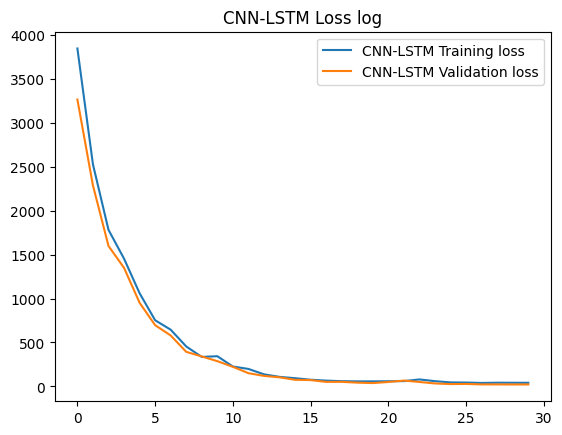

In [21]:
plt.plot(cnn_lstm_history.history["loss"], label="CNN-LSTM Training loss")
plt.plot(cnn_lstm_history.history["val_loss"], label="CNN-LSTM Validation loss")
plt.legend()
plt.title("CNN-LSTM Loss log")
plt.show()